# <center> **Foundations of Applied Machine Learning**
## <center> Summer 2025

### <center> **Prof. Bahram Mobasher**
### <center> Teaching Assistant: **Sanaz Imanlou** | email: *sanaz.imanlou@email.ucr.edu* | [Course webpage](https://github.com/sanaz007/PHYS_243)
### <center> Week 8 : Regression, Gradient Descent

We have already worked with the idea of regression when we were fitting line through our data set. But first let's talk about **supervised learning** algorithms in general. 


## Supervised learning:


These are the concepts to know:

### Training set:

Imagine that you have $N$ example such as $(\vec{x}_1, y_1)$, $(\vec{x}_2, y_2)$, ... $(\vec{x}_N, y_N)$. In which $\vec{x}$ is the vector of features, and $y$ is the output of that given $\vec{x}$.

We assume that there is an underlying function that give the values for each $y_i$, so basically $y = f(\vec{x})$. The task is to find the a function $g$ that is best representation of the unknown $f$.


Notice that we did not talk about $\vec{x} \in \mathbb{R}^n $. They can get any value and not restricted to numbers.


### Hypothesis:

Our approximation function $g$ is called hypothesis. And our task is to find the best hypothesis in the space of all the possible hypotheses or **hypothesis space** ($\mathbb{H}$). As you can see we are not looking to find $f$, so there are more than one hypothesis that can fall into our confidence interval.



### Test set:

The way we can make sure that we are on the right track and to monitor our hypothesis performance we separate the original data set into trainging and test sets in a random manner. Basically, we make sure that we have two disctint sets of examples.


So we are trying to learn from the training data to come up with the "best" hypothesis. We do not required $f$ to be deterministic. So we can even learn from the stochastic function by coming up with the $p(y|\vec{x})$.


When we have a finite set of values for $y$ the call the learning problem **classification** and it is also known as Boolean or binary classification when we have only **two** possible oucomes. 


But when we are dealing with a real-valued numbers we call the learning problem **regression**. And we are not trying to find the "real" value of $y$, we are only interested in a conditional excpectation of $y$ or $p(y|\vec{x})$.

We have already saw an example for both, fitting curve for regresson and K-neareset neighbours for classification. 

Now let's go back to our regression problem: 

$$
\begin{equation*}
y_j = f(\vec{X_j})
\end{equation*}
$$

And let's assume that we have a $n$ dimensional array of inputs for each example. (Array of features $X_j$) And each feature vector has a corresponding weight $\vec{w} = (w_1, w_2, ..., w_n)$

$$
\begin{equation*}
g(\vec{x}_j) = w_0 + \sum_{i=1}^n w_i X_{j, i}
\end{equation*}
$$

For convenience we can add a dummy feature $x_{j,0} = 1$.and  So we can write:

$$
\begin{equation*}
g(\vec{X}_j) = \sum_{i=0}^n w_i X_{j, i} = \vec{w} . \vec{X}_j = X \vec{w} 
\end{equation*}
$$

We can find the value for $\vec{w^*}$ by solving the matrix equation analytically.


$$
\begin{align*}
X \vec{w} &= \vec{y} 
\\

X^\intercal (X \vec{w}) &= X^\intercal (\vec{y})
\\
(X^\intercal X)^{-1} (X^\intercal X) \vec{w} &= (X^\intercal X)^{-1} X^\intercal \vec{y}
\end{align*}
$$

Which finally leads to:

$$
\begin{equation*}
\vec{w} = (X^\intercal X)^{-1} X^\intercal \vec{y}
\end{equation*}
$$



The vector $\vec{w}^*$ can be found to be the best answer, by minimizing the squared-error loss on all of the examples: 


$$
\begin{equation*}
\vec{w}^* = argmin_w \sum_j L_2(y_j, \vec{w}.\vec{X_j})
\end{equation*}
$$




In which $X$ is the matrix of the data. Let's look at an example:

In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure)

Making some random data points:

In [3]:
# updating the PATH environment variable (for latex compilation)
import os

os.environ['PATH'] = "/usr/local/bin" + os.pathsep  + os.environ.get('PATH', '')

In [55]:
X = 3.2 * np.random.rand(100, 1)
y = 1.5 + 1.9 * X + np.random.randn(100, 1)

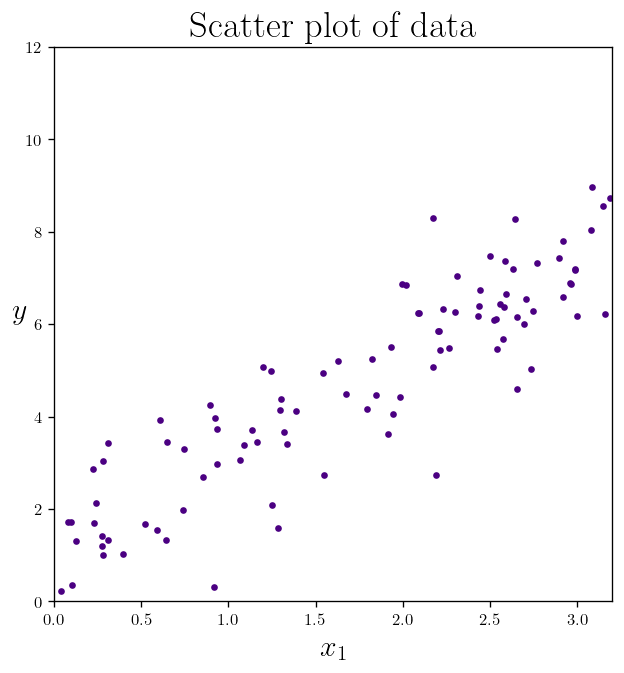

In [4]:
plt.plot(X, y, ".", color="indigo")


plt.title(r"Scatter plot of data")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.axis([0, 3.2, 0, 12])


plt.show()

Adding the dummy feature $x_{j,0} = 1$:

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

Finding the weights:

According to our previously found solution:
$$
\begin{equation*}
w = (X^\intercal X)^{-1} X^\intercal y
\end{equation*}
$$


In [6]:
inv = np.linalg.inv

weight_best = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

This is the weights we found:

In [7]:
weight_best

array([[1.13537769],
       [2.06411826]])

Now that we have the best weights, we can make a prediction about the following $X_{new}$: 

In [8]:
X_new = np.array([[0], [3.2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

And this is the prediction vector we got:

In [9]:
y_predict = X_new_b.dot(weight_best)
y_predict

array([[1.13537769],
       [7.74055614]])

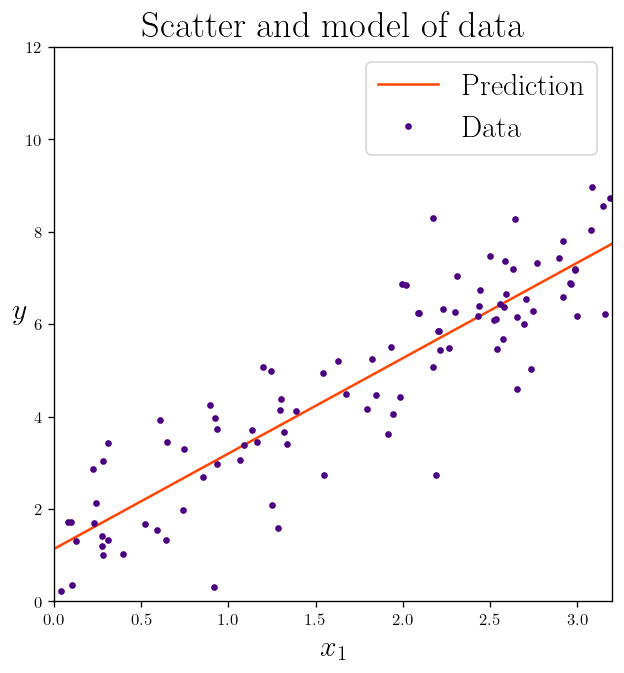

In [10]:
plt.plot(X_new, y_predict, "-", color="orangered", label="Prediction")
plt.plot(X, y, ".", color="indigo", label="Data")


plt.title(r"Scatter and model of data")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$", rotation=0,)

plt.legend(fontsize = 18)
plt.axis([0, 3.2, 0, 12])


plt.show()

Now let's use the [skit-learn](https://scikit-learn.org/stable/) library to do the same thing:

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

After defining our `lin_reg` model, let's fit the data:

In [12]:
lin_reg.fit(X, y)

LinearRegression()

In [13]:
print("The intercept of the linear model:",  lin_reg.intercept_)
print("The slope of the linear model:",  lin_reg.coef_)

The intercept of the linear model: [1.13537769]
The slope of the linear model: [[2.06411826]]


Let's plot the prediction and data again:

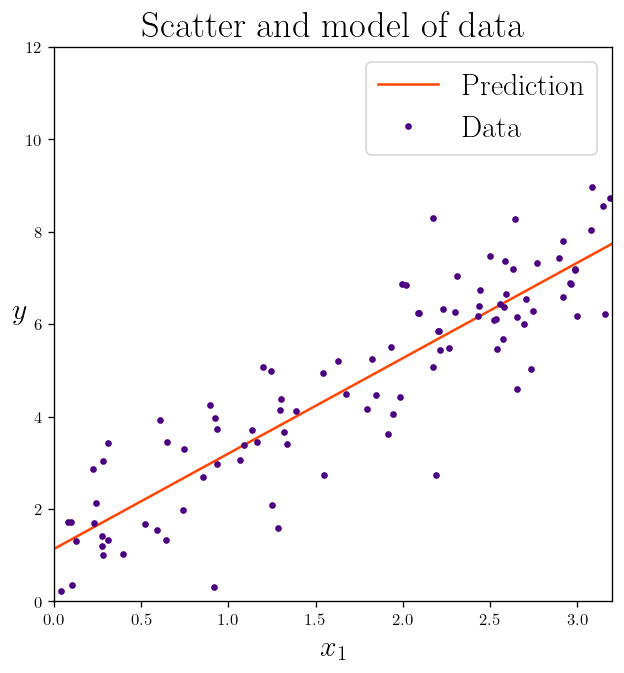

In [14]:
x_span = np.array([0, 3.2])
X_span = x_span.reshape((len(x_span), 1))

plt.plot(x_span, lin_reg.predict(X_span), "-", color="orangered", label="Prediction")
plt.plot(X, y, ".", color="indigo", label="Data")

plt.title(r"Scatter and model of data")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$", rotation=0,)

plt.legend(fontsize = 18)
plt.axis([0, 3.2, 0, 12])

plt.show()

## Computational complexity:

### Number of features:

Analytical solution computation time depends on the required time for inversing a matrix which is 
between $O(n^{2.373})$ for optimized **Coppersmith–Winograd** like algorithms and $O(n^3)$ for usual **Gauss-Jordan** elimination when $n$ is the number of features. 


So you can see that doubling the number of features will require 5 to 8 times more computation time, which means when are dealing with large number of features we should think about better ways of finding the model.


### Number of examples in training set:

One of the strongest features of the anayltical solution is that the computational time scales linearly which means $O(n)$ which is very reasonable for large datasets. (As long as you can fit your data into your memory)


source: https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations

For cases that the straightforward method is not suitable we can use optimization. One the most general optimization for finding the optimal solution is **Gradient Descent (GD)**.

# Gradient Descent:


The basic idea is to tweak the parameters until you reach to the optimal solution. So the idea is to make best decision locally. So finding the gradient at each point starting from some **random initialization** and moving along the direction of the gradient (or oppose for finding minimum) till we reach to the optimal point with zero gradient. Imagine your hiking on the mountain an trying to get to the peak in the most. You can make the decision to move along the path that makes the maximum change in height. (Not a wise decision when you are actually hiking!) That's how can we reach to the top in minimal fashion.

In [15]:
_x_ = np.linspace(-10, 10)
_y_ = np.linspace(-10, 10)

X1, Y1 = np.meshgrid(_x_, _y_)

Z1 = X1**2 + Y1**2


_movements_X = np.array([-10, -7, -4, -2, -1, 0])
_movements_Y = np.array([-10, -7, -4, -2, -1, 0])

_movements_Z = _movements_X**2 + _movements_Y**2


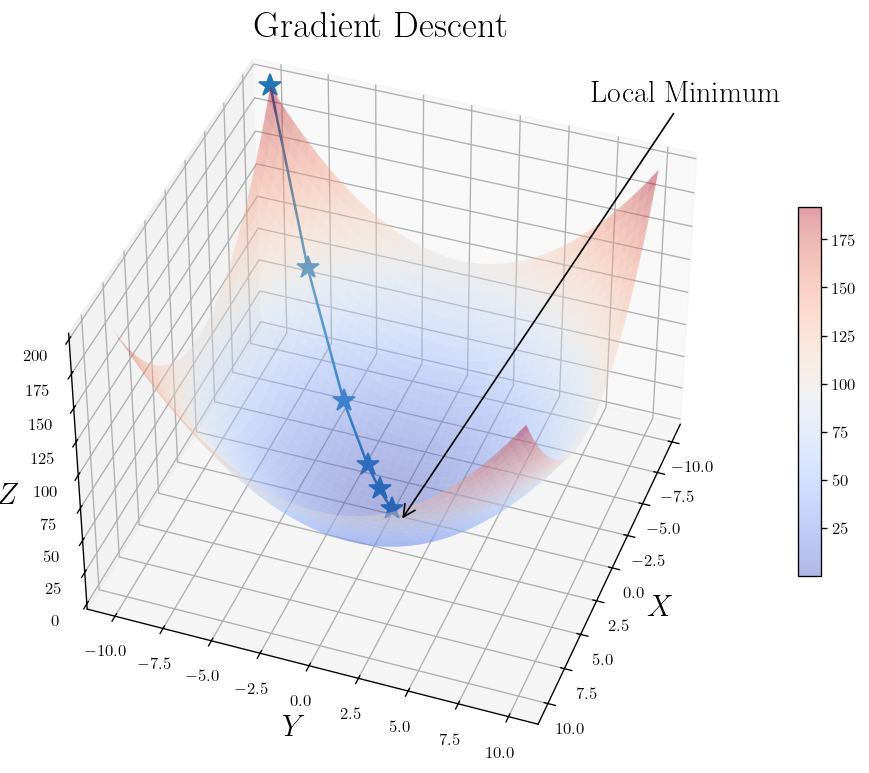

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection = '3d')
ax.view_init(azim = 120, elev = 20)


# Plot the surface.
surf = ax.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True,
                       alpha = 0.4)

ax.plot(_movements_X, _movements_Y, _movements_Z, "*-", markersize= 14,)

plt.annotate("Local Minimum", xy=(0.0022, -0.035), xytext=(0.05,0.07), arrowprops={"arrowstyle" : "->"})

# ax.text(9, 0, 0, "red", color='red')


plt.title(r"Gradient Descent", y =1.05)

ax.view_init(40, 20)

ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$Z$")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=16)

plt.show()


One of the most important parameters in the GD is the **learning rate**. (learning rate hyperparameter) And one the important tasks is to select this wisely otherwise too small learning rate makes the algorthim too long to converge and if it is too large it can miss the optimal point.



The figure above is for the case that we have a **global** minimum and a **continuous** and **convex** function (line between any two points on the surface does not got through the surface) 


In this special case of linear regression we deal with a function that has all these features which make the GD to get arbitrary close to the global minimum within given learning rate reach. Another thing to remember is that we can have different time of convergence if the features have different scales. (unnormalized features) So a good practice is to scale the features first then apply GD algorithm.

# Linear regression with batch gradient descent:


The first thing we should do is to find the cost/loss function ($L$) and the gradient of the cost function with respect to it's parameters ($w_j$) so basically we need to find the following:

$$
\begin{equation*}
\frac{dL}{d\vec{w}}|_{X} = \vec{\nabla}_{w_i} L(X, \vec{w}) = \vec{\nabla}_{w_i} L_2(X, \vec{w})
\end{equation*}
$$

And in the case linear regression we have $L_2$ which is the squared error loss function, so we can find the gradient first and then define the steps for walking towards the optimal point on the surface.

In [17]:
def L_2(_X_, _y_, _w_):
    # Finding the number of examples and features
    Num = len(_y_) # N
    num = len(_w_) # n
    
    # Reshaping _y_ with shape(1, N) to (N, 1)
    _y_ = np.reshape(_y_, (Num, 1))
    # Reshaping _w_ with shape(1, n) to (n, 1)
    _w_ = np.reshape(_w_, (num, 1))
    
    s_loss = (_X_.dot(_w_) - _y_) #g(x) - _y_  [difference between predicted and actual]
    
    Loss =  1 / Num * s_loss.T.dot(s_loss)
    return Loss

In [18]:
def weight_space(_w_): return L_2(X_b, y, _w_)

In [19]:
w0_span = np.linspace(0.5, 3, 100)
w1_span = np.linspace(0.5, 3, 100)

w0, w1 = np.meshgrid(w0_span, w1_span)


z_loss = [(w_0, w_1, weight_space([w_0, w_1])) for _w_0, _w_1 in zip(w0, w1) for w_0, w_1 in zip(_w_0, _w_1)]  
z = np.array([z[2] for z in z_loss])

global_min = min(z)

In [20]:
z = np.reshape(z, (100, 100))

In [21]:
def plot_L_2_Loss_function(angle=[0, 30]):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter

    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection = '3d')
    ax.view_init(azim = 120, elev = 30)


    # Plot the surface.
    surf = ax.plot_surface(w0, w1, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True,
                           alpha = 0.4)

    ax.scatter3D(weight_best[0], weight_best[1], global_min, s=40, marker="*", label=r"Global minimum")


    plt.title(r"Gradient Descent")
    ax.view_init(angle[0], angle[1])


    ax.set_xlabel("$w_0$")
    ax.set_ylabel("$w_1$")
    ax.set_zlabel("L", rotation = 0)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=16)

    plt.legend(fontsize=14, loc=(0.7, 0.7))
    return fig, ax

<Figure size 1440x960 with 0 Axes>

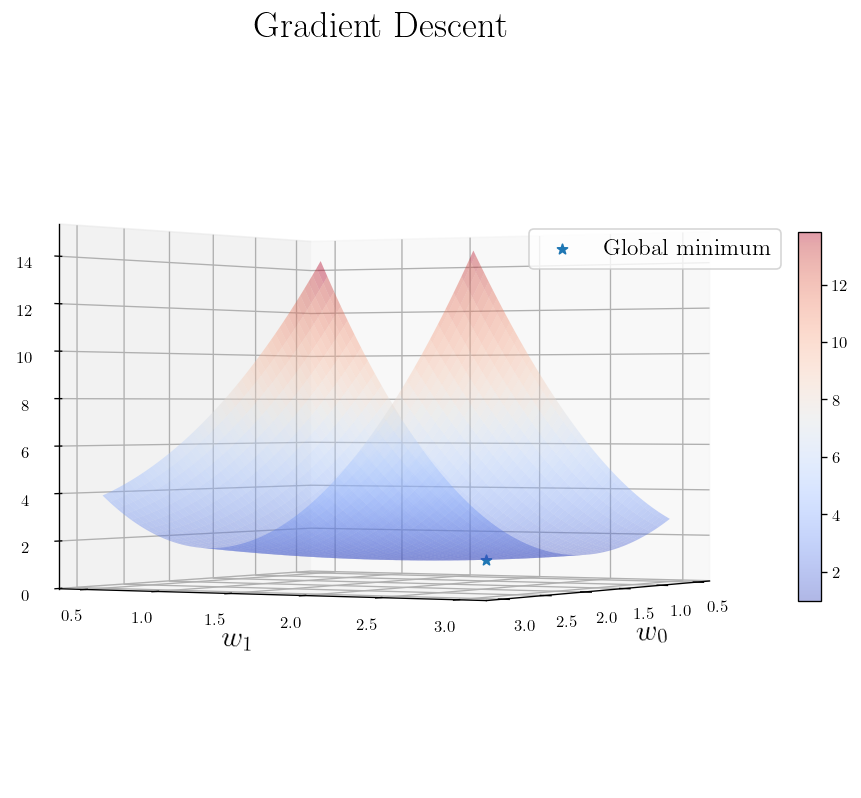

In [22]:
plt.figure(figsize=(12, 8))

plot_L_2_Loss_function()

plt.show()

(<Figure size 1200x960 with 2 Axes>,
 <Axes3D: title={'center': 'Gradient Descent'}, xlabel='$w_0$', ylabel='$w_1$', zlabel='L'>)

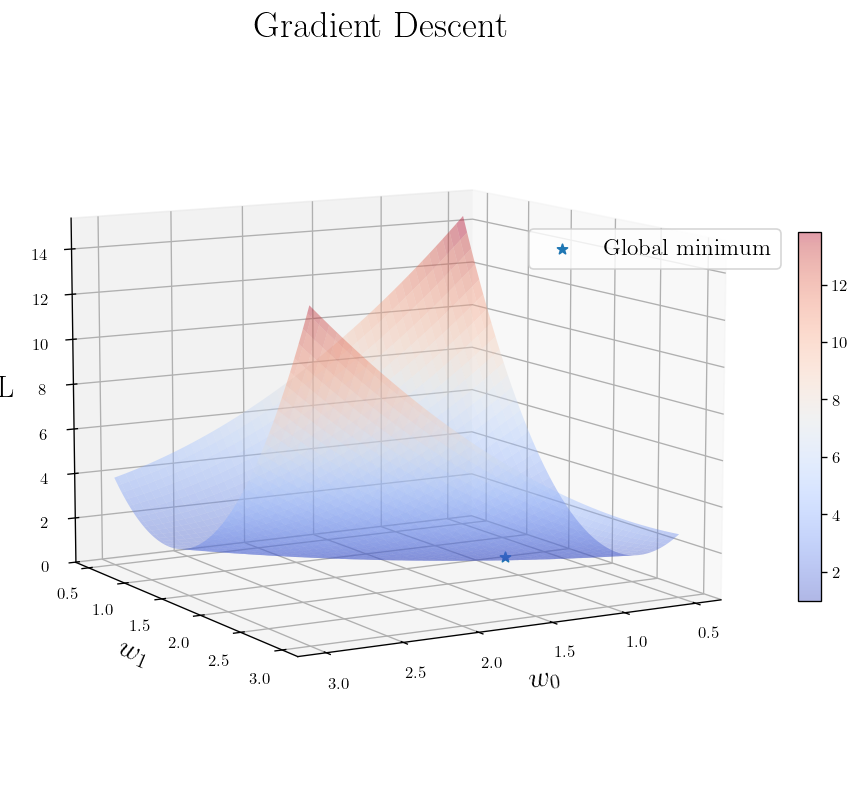

In [23]:
plot_L_2_Loss_function([10, 60])

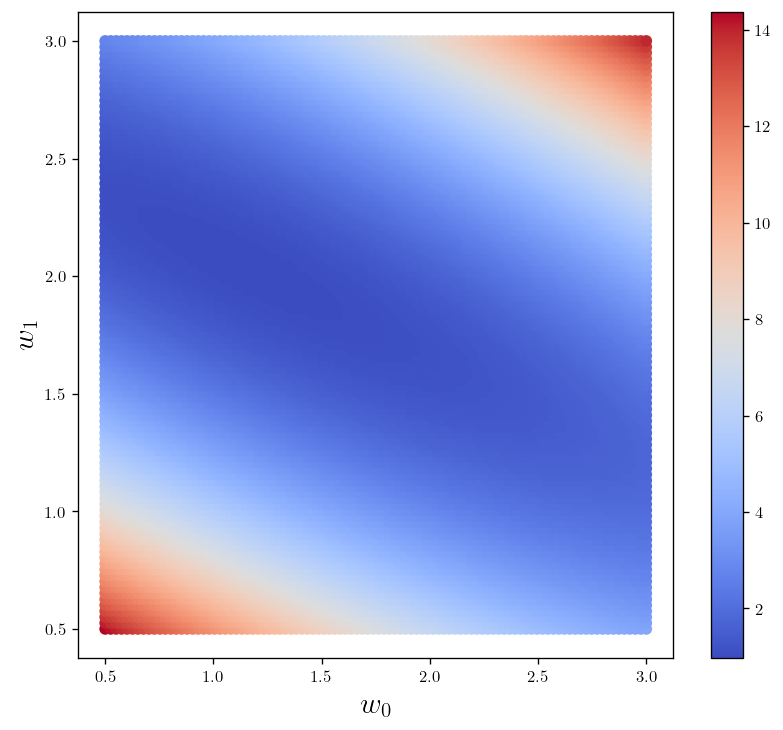

In [24]:
def L_2_heatmap():
    fig = plt.figure(figsize=(8,7))
    plt.scatter(w0, w1, c = z, cmap=cm.coolwarm)

    plt.xlabel(r"$w_0$")
    plt.ylabel(r"$w_1$")

    plt.colorbar()
    return fig

L_2_heatmap()
plt.show()

In [25]:
def Gradient_LR(_X_, _y_, _w_):
    """
    This is the function to find the gradient of the Linear regression
    loss function:
    
    gradient(L_2)_w = (2 / N) * X^T * (X*w - y) 
    
    N: Number of examples
    n: Number of features (including the intercept)
    
    INPUT:
    ======
            _X_ (a matrix of size (N, n)) : 
                                            [[X11=1, X12, ..., X1n],
                                             [X21=1, X22, ..., X2n],
                                             .
                                             .
                                             .
                                             [XN1=1, XN2, ..., XNn]]
           
           
           _y_ (a vector (matrix) of size (N, 1)): [[y1],
                                                    [y2],
                                                    .
                                                    .
                                                    .
                                                    [yN]]
                                                    
                                                
           _w_ (a vector (matrix) of size (n, 1)): [[w0],
                                                    [w1],
                                                    [w2],
                                                    .
                                                    .
                                                    .
                                                    [wn]]
                                                    
    OUTPUT:
    ======
           
            The gradient vector in the shape (n, 1)
     
    """
    
    
    # Finding the number of examples and features
    Num = len(_y_) # N
    num = len(_w_) # n
    
    # Reshaping _y_ with shape(1, N) to (N, 1)
    _y_ = np.reshape(_y_, (Num, 1))
    # Reshaping _w_ with shape(1, n) to (n, 1)
    _w_ = np.reshape(_w_, (num, 1))
        
    
    # single loss: (X.w - y)
    _Loss_ = _X_.dot(_w_) - _y_
    
    # 2/num * X^T (n, N) * loss (N, 1) 
    grad_sum_loss = (2 / Num) * _X_.T.dot(_Loss_)
    return grad_sum_loss

### Finding learning rate/walking steps

$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(X, y, w)}
\end{equation*}
$$

In [ ]:
def BGD(X_b, y, eta=0.1, n_iterations=100):
    m = len(y)
    #initial position
    theta= np.random.rand(2,1)

    theta_list = []
    for iteration in range(n_iterations):
        gradients = Gradient_LR(X_b, y, theta)
        theta= theta - eta * gradients
        theta_list.append(theta)

    return theta, theta_list

def plot_batch_gradient_descent(X, y, theta_l, eta):
    plt.plot(X, y, ".", color="indigo")
    x_0, x_1 = min(X), max(X)
    
    for i, theta in enumerate(theta_l):
        b, m = theta[0], theta[1]
        
        def f(x): return m*x+b
        colors = ["#039F1B", "orangered"]
        if i==0: 
            color=colors[i] 
        else: 
            color=colors[-1] 
        
        plt.plot([x_0, x_1], [f(x_0), f(x_1)], color=color)
        plt.title(r"$\eta={}$".format(eta))

Now let's plot the _Batch Gradient Descent_ for $\eta = [0.002, 0.02, 0.1, 0.2, 0.4, 0.8]$:

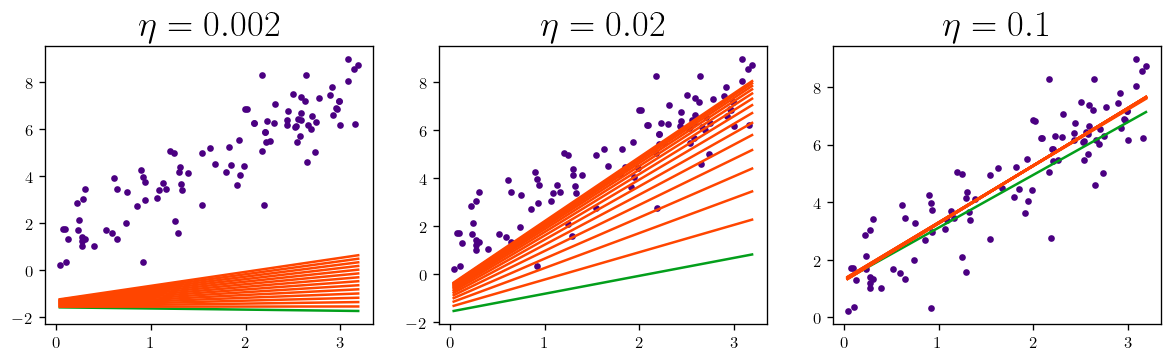

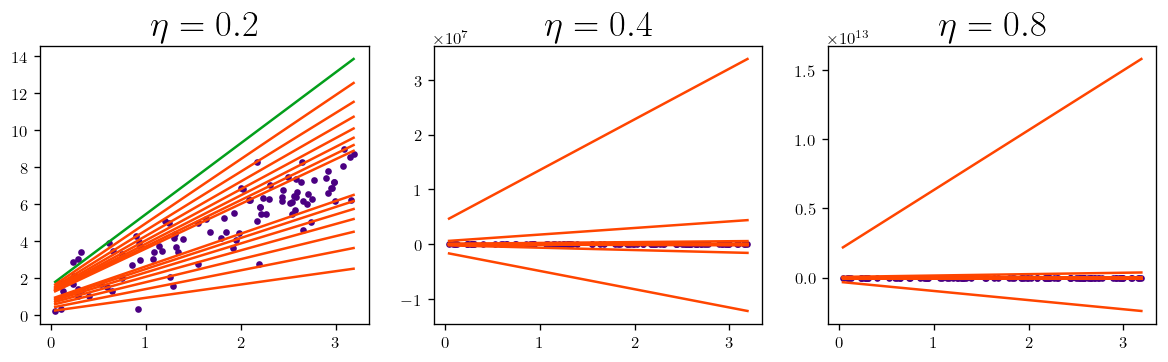

In [47]:
np.random.seed(55)

plt.figure(figsize=(12,3))

etas = [0.002, 0.02, 0.1]
for eta, sp in zip(etas, [131, 132, 133]):
    theta, theta_l = BGD(X_b, y, eta, 15)
    plt.subplot(sp);plot_batch_gradient_descent(X, y, theta_l, eta)

    
plt.figure(figsize=(12,3))
etas = [0.2, 0.4, 0.8]
for eta, sp in zip(etas, [131, 132, 133]):
    theta, theta_l = BGD(X_b, y, eta, 15)
    plt.subplot(sp);plot_batch_gradient_descent(X, y, theta_l, eta)

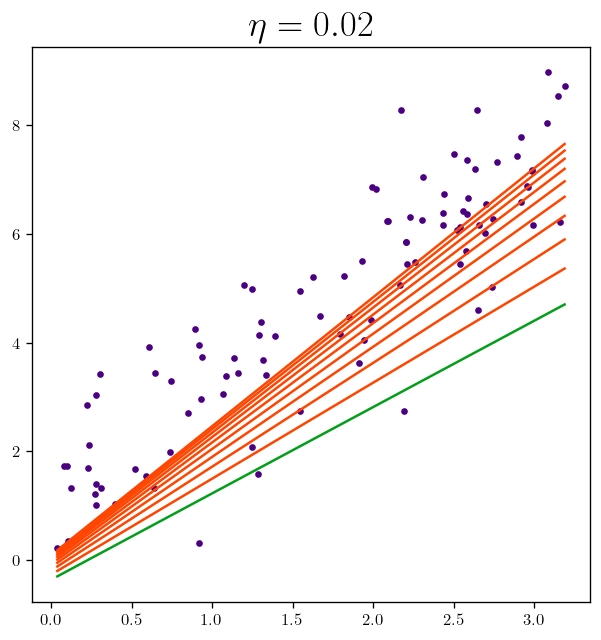

In [49]:
theta, theta_l = BGD(X_b, y, eta=0.02, n_iterations=10)

fig_xy_1 = plot_batch_gradient_descent(X, y, theta_l, eta = 0.02)

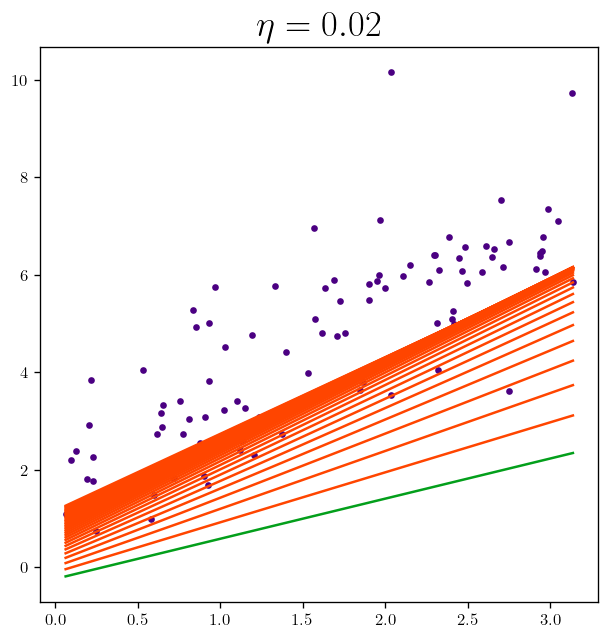

In [56]:
theta, theta_l = BGD(X_b, y, eta=0.02, n_iterations=30)
fig_xy_2 = plot_batch_gradient_descent(X, y, theta_l, eta = 0.02)

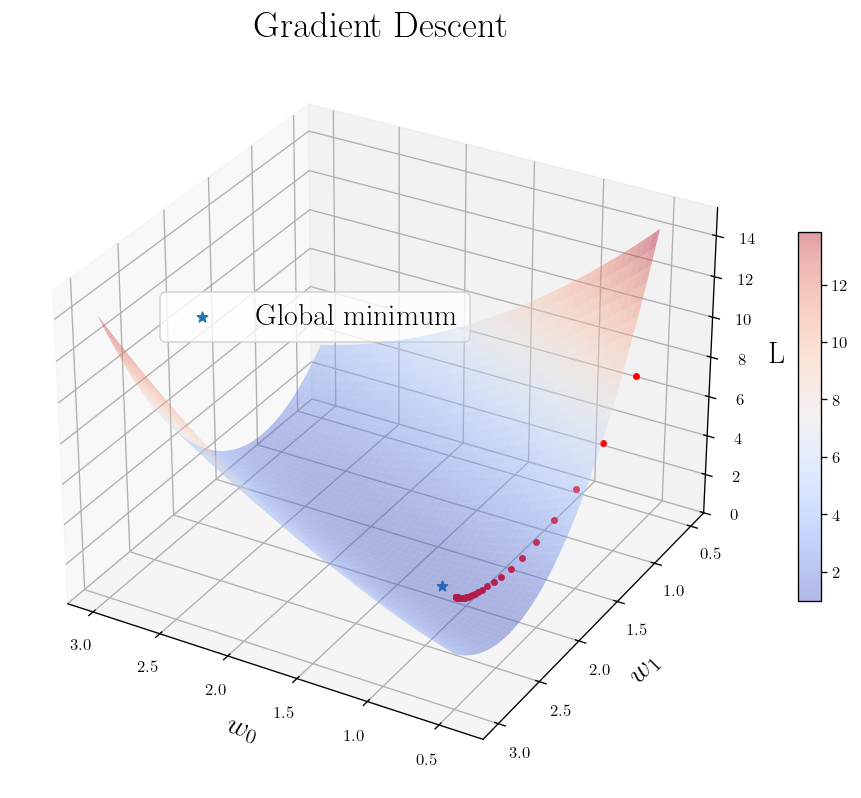

In [51]:
fig, ax = plot_L_2_Loss_function([30, 120])

for i, theta in enumerate(theta_l):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=40, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))

plt.show()

Text(0.5, 1.0, 'Gradient Descnet')

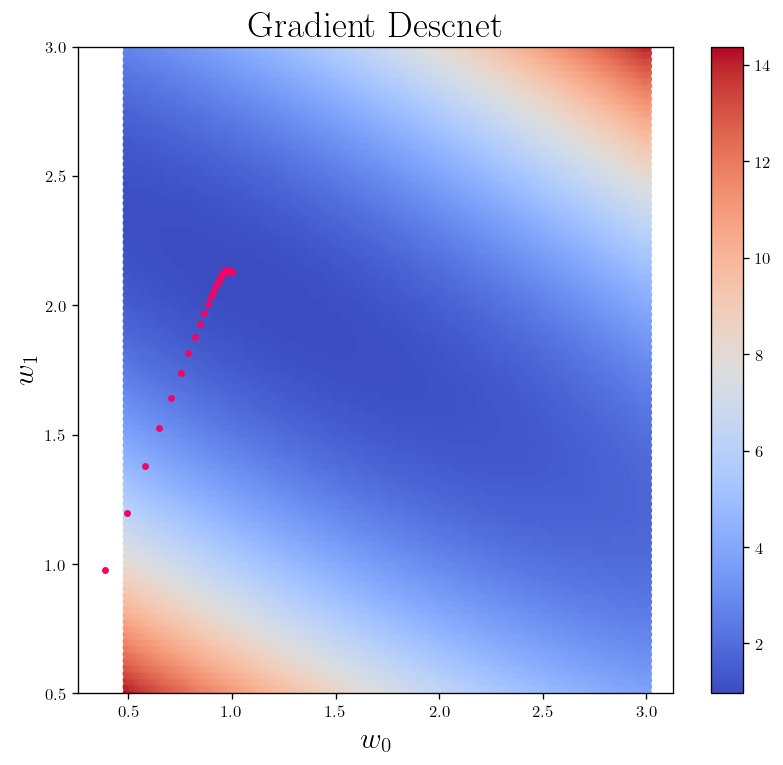

In [53]:
fig_h_1= L_2_heatmap()

for i, theta in enumerate(theta_l):
    plt.scatter(theta[0], theta[1], s=40, marker=".", c= "#EE0766")

plt.ylim(0.5,3)

plt.title(r"Gradient Descnet")

Text(0.5, 0, 'Number of iterations')

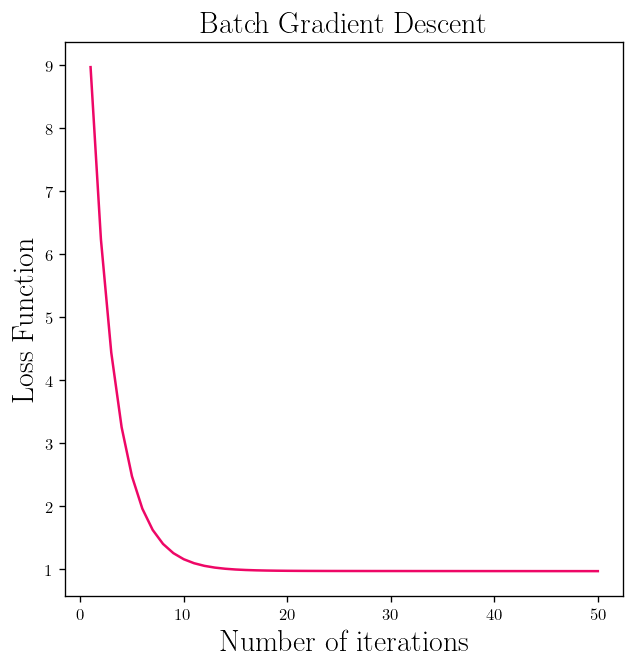

In [54]:
l_2 = []
for theta in theta_l:
    l_2.append(weight_space(theta))

l_2 = [l2[0] for l2 in l_2]

plt.title(r"Batch Gradient Descent", fontsize=18)
fig__loss_1 = plt.plot(range(1, len(l_2)+1), l_2,  c = "#EE0766")

plt.ylabel(r"Loss Function")
plt.xlabel(r"Number of iterations")

The convergence of the batch gradient descent when the function (cost function) is convex and it has continuous derivative is $O(n^{-1})$ in which $n$ is the number of iterations. So if you are looking to get 10 time more accurate you need to iterate 10 times more. (With constant learning rate) 